<a href="https://colab.research.google.com/github/erikaprbwt/EDA_using_python/blob/main/EDA_gamedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

##**Import data penjualan video game (vgsales.csv)**

In [ ]:
#mounting google drive ke dalam google colab agar dapat membuka file dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries yang dibutuhkan untuk analisis dan visualisasi data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset csv dari google drive
df=pd.read_csv('/content/drive/MyDrive/vgsales.csv')

Data dictionary:
*  Rank - Ranking of overall sales
*  Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.
Source: https://www.kaggle.com/gregorut/videogamesales

In [ ]:
#memodifikasi library matplotlib untuk menampilkan gambar dengan ukuran tertentu
from matplotlib import rcParams
rcParams['figure.figsize'] = (12,4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

## **Statistik Deskriptif Dataset**

In [ ]:
#menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*   Dataset yang digunakan yaitu penjualan video game (vgsales.csv) yang memiliki 16598 baris dan 11 atribut.
*   Atribut terdiri dari 6 data bertipe float (desimal), 1 tipe integer dan 4 tipe object (string).
*   Pada atribut `Year` dan `Publisher`, terdapat sejumlah data null.

In [ ]:
#menampilkan 5 baris pertama dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


*   Jika dilihat dari 5 baris teratas, tidak terlihat anomali atau dapat dikatakan bahwa data sesuai dengan nama atribut.
*   Atribut `Year` bertipe float dan belum dapat diubah menjadi integer karena mengandung data null.

In [ ]:
#mengetahui banyak data `Year` yang berisi null
df['Year'].isna().sum()

271

In [ ]:
#mendefinisikan atribut berdasarkan tipe data numerik atau ketegorik
num = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']
cats = ['Name','Platform','Genre','Publisher']

In [ ]:
#menampilkan statistik deskriptif data numerik
df[num].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


*   Berdasarkan atribut `Year`, dataset berisi data penjualan video game dari tahun 1980 hingga 2020.
*   Atribut `NA_Sales`, `EU_Sales`, `JP_Sales`dan `Other_Sales` mengandung terlalu banyak nilai 0 (tidak terjual) hingga mendominasi 25% hingga 50% quantil.

In [ ]:
#menampilkan statistik deskriptif data kategorik
df[cats].describe()

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


*  Atribut `Name` dan `Publisher` memiliki terlalu banyak nilai unik yaitu berturut-turut 11493 dan 578.
*  Atribut `Platform` memiliki nilai yang sering muncul sebanyak 2163 data yaitu "DS".
*  Atribut `Genre` memiliki nilai yang sering muncul sebanyak 3316 data yaitu "Action".
*  Diantara data bertipe kategorik, hanya atribut `Publisher` yang mengandung nilai null.

In [ ]:
#menampilkan banyaknya data null dari atribut `Publisher`
df['Publisher'].isna().sum()

58

## **Univariate Analysis**

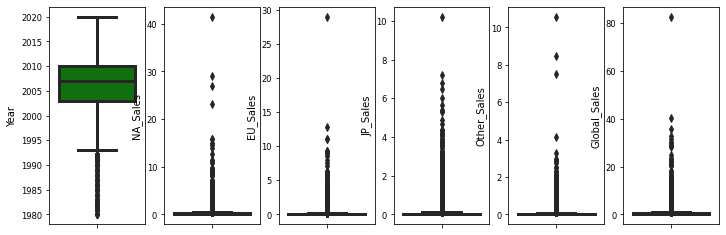

In [ ]:
#membuat boxplot untuk mendeteksi outlier
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='green',orient='v')

*   Outlier terlihat pada `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales` dan `Global_Sales` setelah data bernilai 0 hingga 1 juta.
*   Boxplot `Year` tidak perlu diperhatikan sebaran outliernya karena merupakan atribut waktu.

In [ ]:
#menampilkan data di baris tertentu
df[2000:2010]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2000,2002,F-Zero: Maximum Velocity,GBA,2001.0,Racing,Nintendo,0.39,0.16,0.37,0.12,1.04
2001,2003,Bomberman 64,N64,1997.0,Puzzle,Hudson Soft,0.50,0.20,0.31,0.03,1.04
2002,2004,Jeremy McGrath Supercross 98,PS,1998.0,Racing,Acclaim Entertainment,0.91,0.10,0.00,0.03,1.04
2003,2005,LEGO Indiana Jones 2: The Adventure Continues,X360,2009.0,Action,Activision,0.62,0.33,0.00,0.09,1.04
2004,2006,Project CARS,PS4,2015.0,Racing,Slightly Mad Studios,0.17,0.69,0.02,0.15,1.04
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
2006,2008,Kirby: Mass Attack,DS,2011.0,Platform,Nintendo,0.52,0.06,0.41,0.05,1.04
2007,2009,LEGO Marvel Super Heroes,XOne,2013.0,Action,Warner Bros. Interactive Entertainment,0.61,0.34,0.00,0.09,1.04
2008,2010,ZhuZhu Pets,DS,2010.0,Simulation,Activision,0.68,0.27,0.00,0.09,1.04
2009,2011,Tom Clancy's Ghost Recon Advanced Warfighter 2,PS3,2007.0,Shooter,Ubisoft,0.34,0.48,0.02,0.19,1.04


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

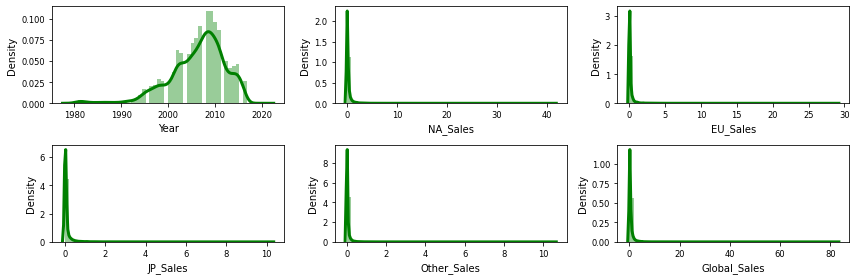

In [ ]:
#membuat distplot dara numerik
for i in range (0, len(num)):
   plt.subplot(2, len(num)/2, i+1)
   sns.distplot(df[num[i]], color='green')
   plt.tight_layout()

* Data ke-2000 hingga 2010 dan distplot yang dibentuk memperlihatkan data penjualan di NA, EU, JP, Other dan Global didominasi oleh nilai 0 hingga 1 juta.
* Diperlukan penanganan jika ingin menganalisis data menggunakan model yang membutuhkan asumsi normalitas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


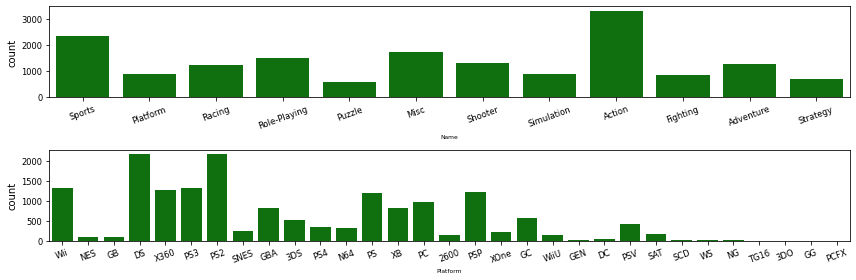

In [ ]:
#membuat countplot data kategorik
newcats=['Genre','Platform']
for i in range(0, len(newcats)):
     plt.subplot(len(newcats),1,i+1)
     sns.countplot(df[newcats[i]],color='green', orient='v')
     plt.xticks(rotation=20)
     plt.xlabel(cats[i], fontsize=6)
     plt.tight_layout()

* Atribut `Year` dan `Publisher` tidak dibentuk countplotnya karena memiliki nilai unik yang terlalu banyak sehingga kemungkinan atribut tersebut tidak terlalu berguna untuk menjadi prediktor.
* Sebaran `Platform` tidak merata, dilihat dari kesenjangan nilai antar publisher. Misalnya, banyak publisher "SCD", "WS","NG", "TG16","3DO", "GG" dan "PCFX" mendekati 0 sedangkan "D5"dan "PS2" banyaknya mencapai 2000.

##**Multivariate Analysis**

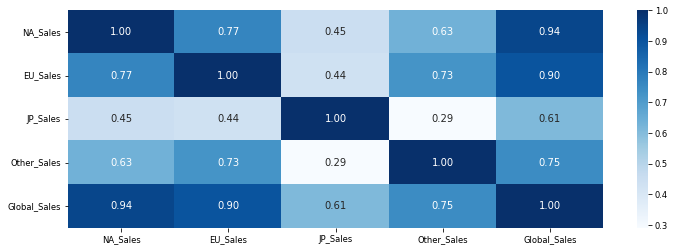

In [ ]:
#membentuk heatmap berisi korelasi antar atribut numerik
newnum=['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales','Global_Sales']
sns.heatmap(df[newnum].corr(), cmap='Blues', annot=True, fmt='.2f')

* Atribut yang berkorelasi sangat tinggi yaitu `NA_Sales` dengan `Global_Sales` serta `EU_Sales` dengan `Global_Sales`, sehingga memungkinkan kedua atribut tersebut redundan.
* Mengingat atribut `Global_Sales` merupakan penjumlahan semua penjualan (NA, EU, JP, dan Other), maka atribut tersebut dapat dihapus.

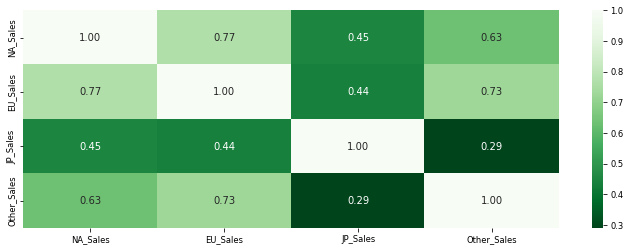

In [ ]:
#membuat heatmap tanpa atribut `Global_Sales`
newnum2=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
sns.heatmap(df[newnum2].corr(), cmap='Greens_r', annot=True, fmt='.2f')

## **Kesimpulan**
* Nilai null atau missing values pada atribut `Year` perlu dihilangkan pada tahap pre-processing.
* Nilai penjualan lebih dari 1 juta pada atribut `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales` dan `Global_Sales` perlu dihilangkan karena merupakan outlier.
* Atribut `Global_Sales` dapat dihilangkan karena redundan (memiliki nilai sama dengan atribut yang lain).